# OPTIONAL: Install Detectron2

Run this block if Detectron2 is not found

In [9]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Using cached PyYAML-5.1.tar.gz (274 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      running egg_info
      creating /tmp/pip-pip-egg-info-11fw_6d2/PyYAML.egg-info
      writing /tmp/pip-pip-egg-info-11fw_6d2/PyYAML.egg-info/PKG-INFO
      writing dependency_links to /tmp/pip-pip-egg-info-11fw_6d2/PyYAML.egg-info/dependency_links.txt
      writing top-level names to /tmp/pip-pip-egg-info-11fw_6d2/PyYAML.egg-info/top_level.txt
      writing manifest file '/tmp/pip-pip-egg-info-11fw_6d2/PyYAML.egg-info/SOURCES.txt'
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-4im_rm7e/pyyaml_762b9413420e49588fc5ddb8d2dbf51f/setup.py", line 291, in <module>
          setup(
        File "/home/guests/nguyentoan_le/anaconda3/envs/One

# Register New Dataset

OneFormer uses the information (class names, thing classes, etc.) stored in a dataset's metadata while preparing a dataset dictionary using a dataset_mapper.

In [1]:
import os
from detectron2.data import MetadataCatalog, DatasetCatalog

def get_CaDIS_dicts(CaDIS_dir, video_idx):
    dataset_dicts = []
    
    videos_list = os.listdir(CaDIS_dir)

    for video in videos_list:
        record = {}
        
        filename = os.path.join(CaDIS_dir, video)
        image_id = video                         # Video1_frame000090.png
        pos = image_id.find('frame')
        image_id = image_id[pos+5:]              # 000090.png
        image_id = image_id[:len(image_id)-4]    # 000090
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = str(video_idx).zfill(2) + "/" + image_id
        record["height"] = height
        record["width"] = width
        record["sem_seg_file_name"] = filename.replace("Images", "Labels")

        dataset_dicts.append(record)
        
    return dataset_dicts
        

num_videos = 25
CaDIS_dir = "/home/data/CaDISv2"

for i in range(1, num_videos+1):
    video_folder_name = "CaDIS_" + str(i).zfill(2)
    CaDIS_dir = os.path.join(CaDIS_dir, "Video"+str(i).zfill(2), "Images")
    
    DatasetCatalog.register(video_folder_name, lambda i=i: get_CaDIS_dicts(CaDIS_dir, i))
    MetadataCatalog.get(video_folder_name).set(stuff_classes=["Pupil", "Surgical Tape", "Hand", "Eye Retractors", "Iris", "Skin", "Cornea",
                                                    "Hydrodissection Cannula", "Viscoelastic Cannula", "Capsulorhexis Cystotomev",
                                                    "Rycroft Cannula", "Bonn Forceps", "Primary Knife", "Phacoemulsifier Handpiece",
                                                    "Lens Injector", "I/A Handpiece", "Secondary Knife", "Micromanipulator", "I/A Handpiece Handle",
                                                    "Capsulorhexis Forceps", "Rycroft Cannula Handle", "Phacoemulsifier Handpiece Handle",
                                                    "Capsulorhexis Cystotome Handle", "Secondary Knife Handle", "Lens Injector Handle",
                                                    "Suture Needle", "Needle Holder", "Charleux Cannula", "Primary Knife Handle",
                                                    "Vitrectomy Handpiece", "Mendez Ring", "Marker", "Hydrodissection Cannula Handle",
                                                    "Troutman Forceps", "Cotton", "Iris Hooks"])

To verify the dataset is in correct format, let's visualize the annotations of randomly selected samples in the training set:

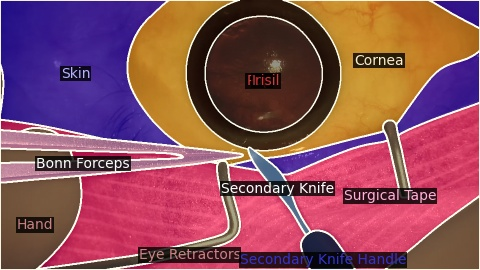

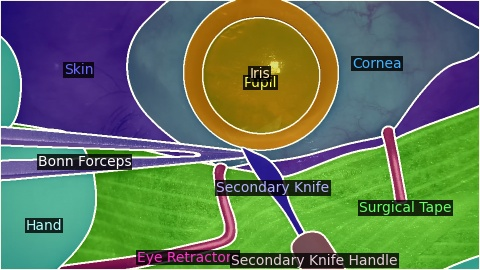

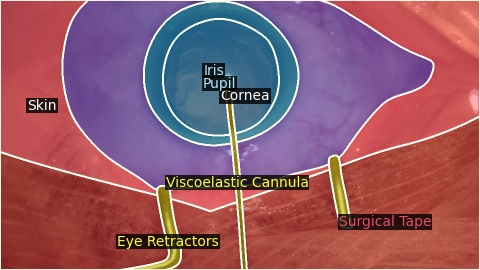

In [2]:
import cv2
import random
from detectron2.utils.visualizer import Visualizer
from IPython.display import display, Image

dataset_dicts = get_CaDIS_dicts("/home/data/CaDISv2/Video01/Images", 1)
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=MetadataCatalog.get('CaDIS_01'), scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    #cv2_imshow(out.get_image()[:, :, ::-1])
    # Convert the output image to RGB format
    img_rgb = out.get_image()[:, :, ::-1]

    # Display the image inline using IPython.display
    display(Image(data=cv2.imencode('.jpg', img_rgb)[1].tobytes()))